# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [2]:
%matplotlib inline
import pandas as pd

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [56]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [57]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [58]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [4]:
#Extract/load/read data
#wb_df2 = json.load((open('data/world_bank_projects.json')))
wb_df = pd.read_json('data/world_bank_projects.json')
wb_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{u'$oid': u'52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{u'Percent': 100, u'Name': u'Social safety nets'}","[{u'code': u'54', u'name': u'Social safety net...",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{u'$oid': u'52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 20, u'Name': u'Administrative and...","[{u'code': u'25', u'name': u'Administrative an...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{u'$oid': u'52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{u'Percent': 100, u'Name': u'Climate change'}","[{u'code': u'81', u'name': u'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{u'$oid': u'52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 87, u'Name': u'Other rural develo...","[{u'code': u'79', u'name': u'Other rural devel...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{u'$oid': u'52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{u'Percent': 33, u'Name': u'Other accountabili...","[{u'code': u'29', u'name': u'Other accountabil...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [ ]:
# Find the ten countries with the most projects

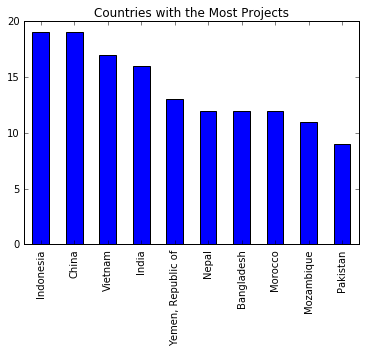

In [5]:
# Set the data frame
wb = wb_df
# Create plot, using value_counts.head(10) to find top 10 countries
# Note - Africa not a country, so it needs to be removed from the count
wb.countryshortname[wb.countryshortname != 'Africa'].value_counts().head(10).plot(kind = 'bar', title = 'Countries with the Most Projects')

In [ ]:
# Find the top ten major project themes

In [38]:
wb.countryshortname.value_counts().head(10)

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

In [60]:
wb.mjtheme_namecode.value_counts().head(10)

[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]                                                                                            12
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]                                                                                                                                                                    11
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]                                                                                                                                                     8
[{u'code': u'4', u'name': u'Financial and private sector development'}, {u'code': u'4', u'name': u'Financial and private sector development'}]                                                                                                       6
[{u'code': u

In [24]:
wb.mjtheme_namecode.value_counts()

[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]                                                                                                                                                                           12
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]                                                                                                                                                                                                                                                   11
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]                                                                                                                                                                                                                                    8
[{u'code': u'4', u'nam

In [10]:
#wb.mjtheme_namecode

In [23]:
wb2 = json.load((open('data/world_bank_projects.json')))
#wb2
#wb_df2
#wb
#wb.theme_namecode

wb_namecode = json_normalize(wb2,'mjtheme_namecode', ['id'])
#wb_namecode.name.value_counts().head(10)
wb_namecode.head()
# Map these blank codes to their appropriate values.

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310
